PROJECT - 2 : AUTOMATED BICYCLE RENTAL SYSTEMS

In [2]:
#While working on EDA (Exploratory Data Analysis) projects, we typically follow certain steps. 
#The initial step involves collecting the data.
#Then the task goes on
#Step-1 : Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Step-2: Loading the data
# Load the daily dataset
daily_data = pd.read_csv(r"C:\Users\aniketh\Downloads\archive2\day.csv")
# Load the hourly dataset
hourly_data = pd.read_csv(r"C:\Users\aniketh\Downloads\archive2\hour.csv")

In [10]:
#Step-3: Displaying basic information
#Daily
print("Fetching daily data information")
print(daily_data.head())
print(daily_data.info())
print(daily_data.describe())
print(daily_data.shape)


Fetching daily data information
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1

In [11]:
#Hourly
print("Fetching hourly data information")
print(hourly_data.head())
print(hourly_data.info())
print(hourly_data.describe())
print(hourly_data.shape)

Fetching hourly data information
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0

In [6]:
#STEP -4 :Checking for null values
print(daily_data.isnull().sum())
print(hourly_data.isnull().sum())


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [7]:
#Checking for Duplicates
print(daily_data.drop_duplicates(inplace=True))
print(hourly_data.drop_duplicates(inplace=True))

None
None


In [8]:
#WE HAVE NO NULL AND NO DUPLICATE VALUES

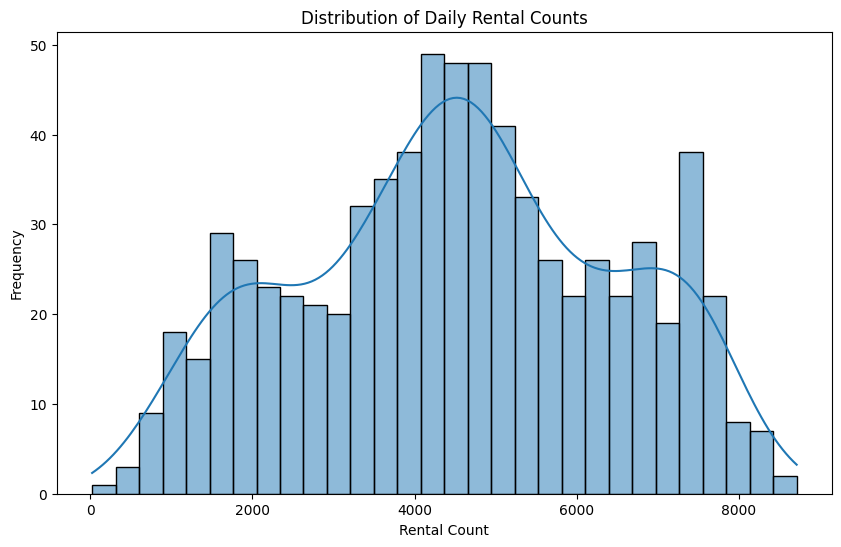

In [12]:
#STEP -5: Analyzing the data
#Day
plt.figure(figsize=(10, 6))
sns.histplot(daily_data['cnt'], bins=30, kde=True)
plt.title('Distribution of Daily Rental Counts')
plt.xlabel('Rental Count')
plt.ylabel('Frequency')
plt.show()

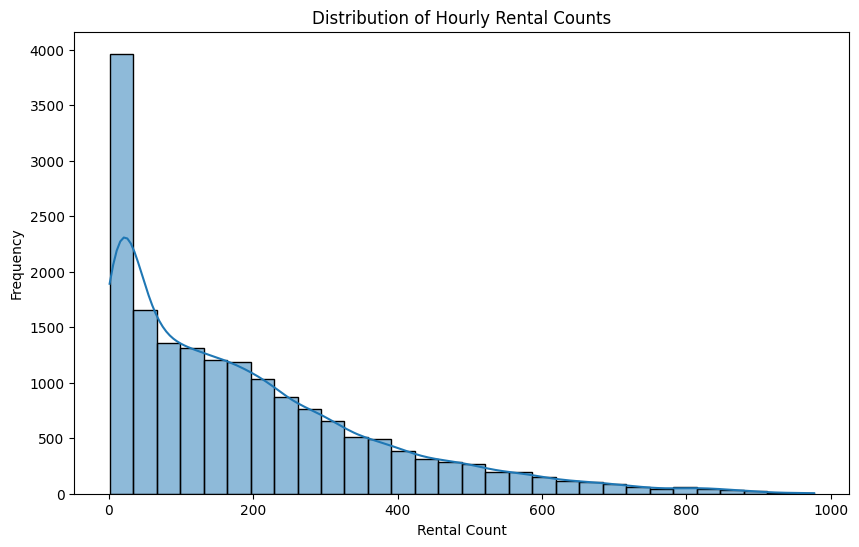

In [13]:
#Hour
plt.figure(figsize=(10, 6))
sns.histplot(hourly_data['cnt'], bins=30, kde=True)
plt.title('Distribution of Hourly Rental Counts')
plt.xlabel('Rental Count')
plt.ylabel('Frequency')
plt.show()

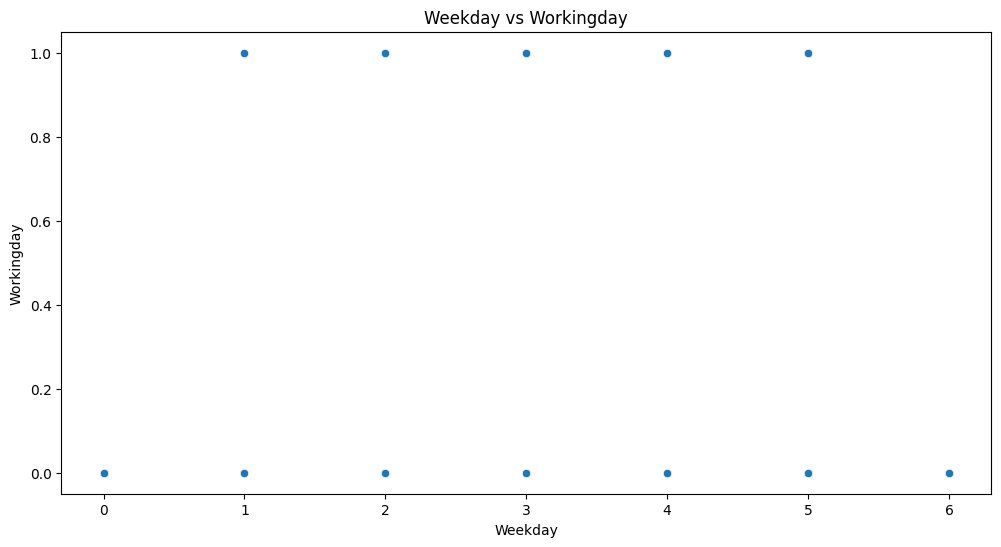

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='weekday', y='workingday', data=daily_data)
plt.title('Weekday vs Workingday')
plt.xlabel('Weekday')
plt.ylabel('Workingday')
plt.show()

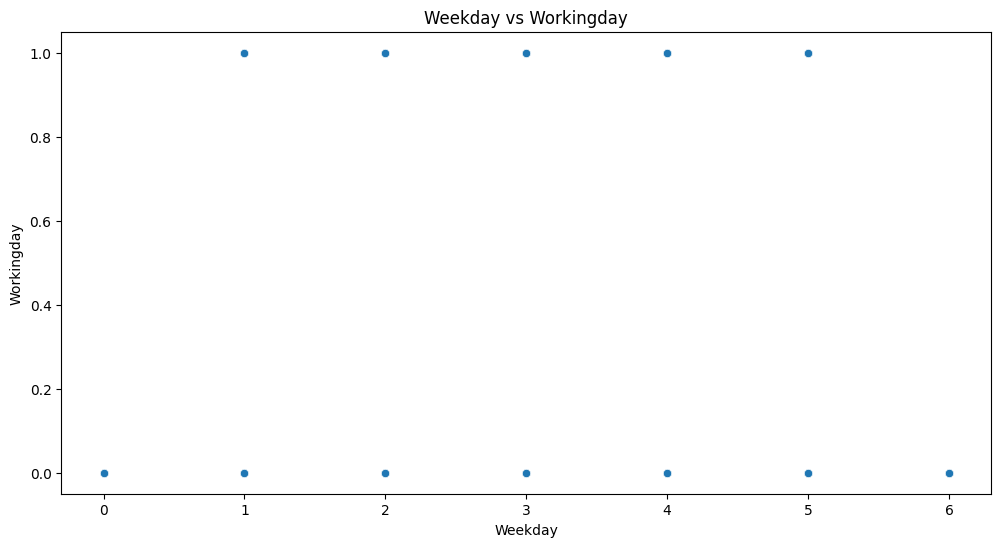

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='weekday', y='workingday', data=hourly_data)
plt.title('Weekday vs Workingday')
plt.xlabel('Weekday')
plt.ylabel('Workingday')
plt.show()

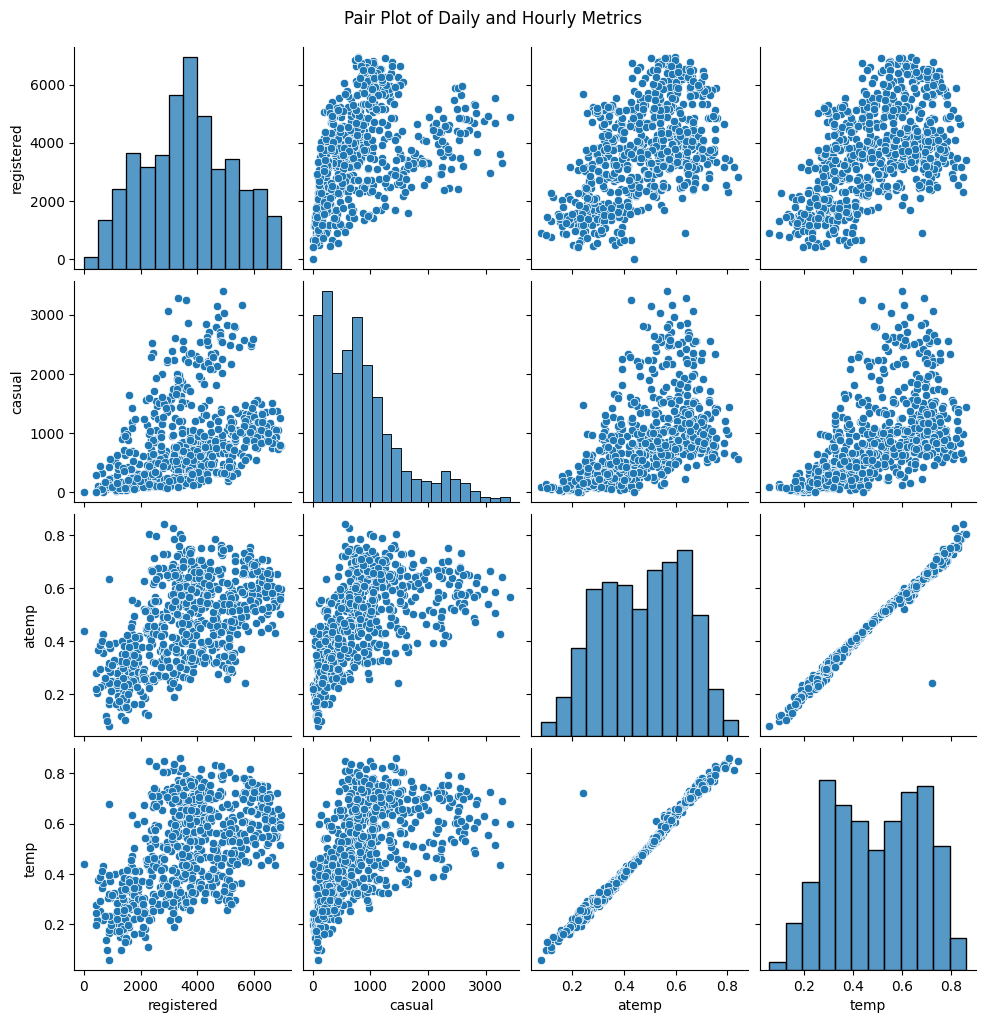

In [19]:
sns.pairplot(daily_data[['registered', 'casual', 'atemp', 'temp']])
plt.suptitle('Pair Plot of Daily Metrics', y=1.02)
plt.show()

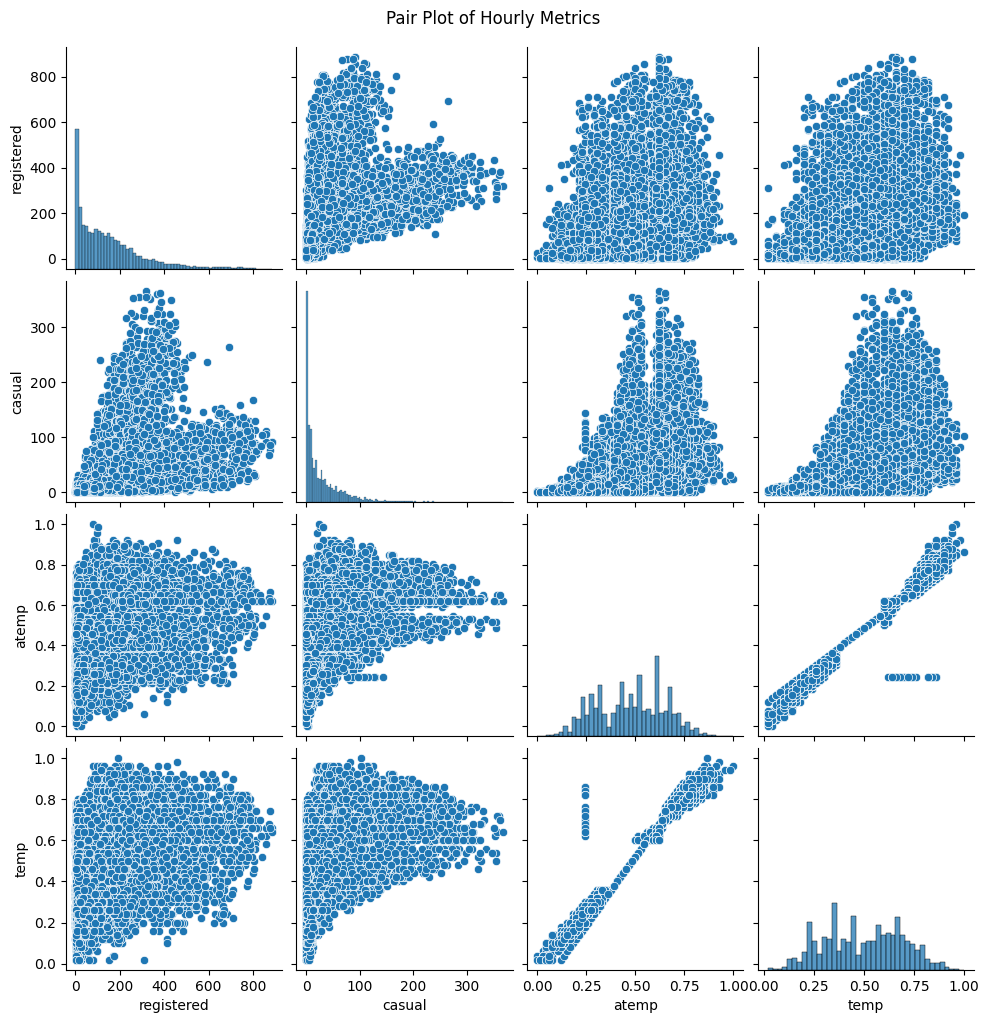

In [20]:
sns.pairplot(hourly_data[['registered', 'casual', 'atemp', 'temp']])
plt.suptitle('Pair Plot of Hourly Metrics', y=1.02)
plt.show()

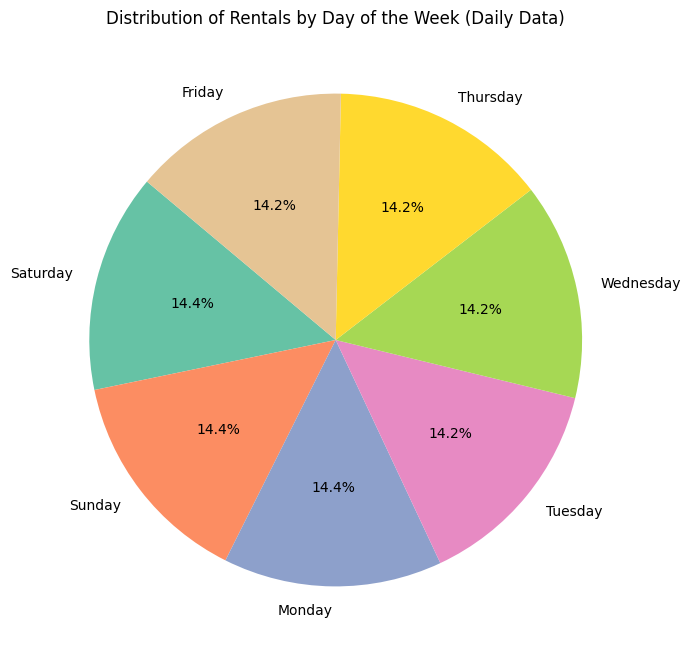

In [23]:
#Step-6 : Visualizing the data
daily_data['dteday'] = pd.to_datetime(daily_data['dteday'], errors='coerce')
daily_data['weekday'] = daily_data['dteday'].dt.day_name()  # Extract day of the week from date
day_counts = daily_data['weekday'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Distribution of Rentals by Day of the Week (Daily Data)')
plt.show()

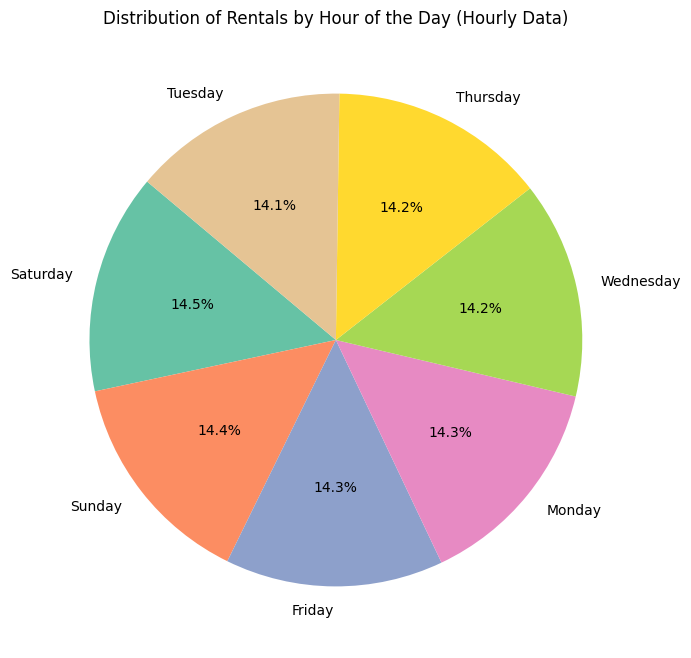

In [24]:
hourly_data['dteday'] = pd.to_datetime(hourly_data['dteday'], errors='coerce')
hourly_data['weekday'] = hourly_data['dteday'].dt.day_name() 
hour_counts = hourly_data['weekday'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(hour_counts, labels=hour_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Distribution of Rentals by Hour of the Day (Hourly Data)')
plt.show()